In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('sales_data.csv')

In [24]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [28]:
df["date"] = pd.to_datetime(df["date"])
df["category"] = df["category"].astype("category")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    category      
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(3), object(1)
memory usage: 15.3+ KB


In [30]:
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [31]:
df["category"].value_counts()

Electronics    130
Clothing       120
Accessories     70
Bags            23
Shoes           23
Bgas             1
Clohting         1
Shoeses          1
Name: category, dtype: int64

In [32]:
df['category'].replace('Bgas','Bags', inplace = True)
df['category'].replace('Clohting','Clothing', inplace = True)
df['category'].replace('Shoeses','Shoes', inplace = True)


In [33]:
df["category"].value_counts()

Electronics    130
Clothing       121
Accessories     70
Bags            24
Shoes           24
Name: category, dtype: int64

In [50]:
df.drop_duplicates(inplace=True)

In [34]:
df["product"].value_counts()

Smartphone    82
T-Shirt       38
Smartwatch    36
Coat          35
Speaker       25
Backpack      24
Hoodie        24
Sneakers      24
Jeans         24
Watch         22
Headphones    13
Wallet        12
Tablet         9
Laptop         1
Name: product, dtype: int64

In [35]:
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [36]:
null_df = df[df.isnull().any(axis=1)]
null_df

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [38]:
df['revenue']= df['revenue'].fillna(2000.0)
df.loc[122,'quantity'] = 11
df.loc[193,'price'] = 150
df.loc[320,'price'] =30

In [40]:
df.isna().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

#### What was the total revenue generated by the company over the course of the year?

In [81]:
df['revenue'].sum()

759130.0

#### Which product had the highest revenue? How much revenue did it generate?

In [56]:
product_revenue = df.groupby('product')['revenue'].sum()
product_revenue

product
Backpack       20400.0
Coat           33800.0
Headphones     18000.0
Hoodie         19800.0
Jeans          20650.0
Laptop          6000.0
Smartphone    434400.0
Smartwatch     60800.0
Sneakers       21600.0
Speaker        39680.0
T-Shirt        20100.0
Tablet         18000.0
Wallet         13200.0
Watch          32700.0
Name: revenue, dtype: float64

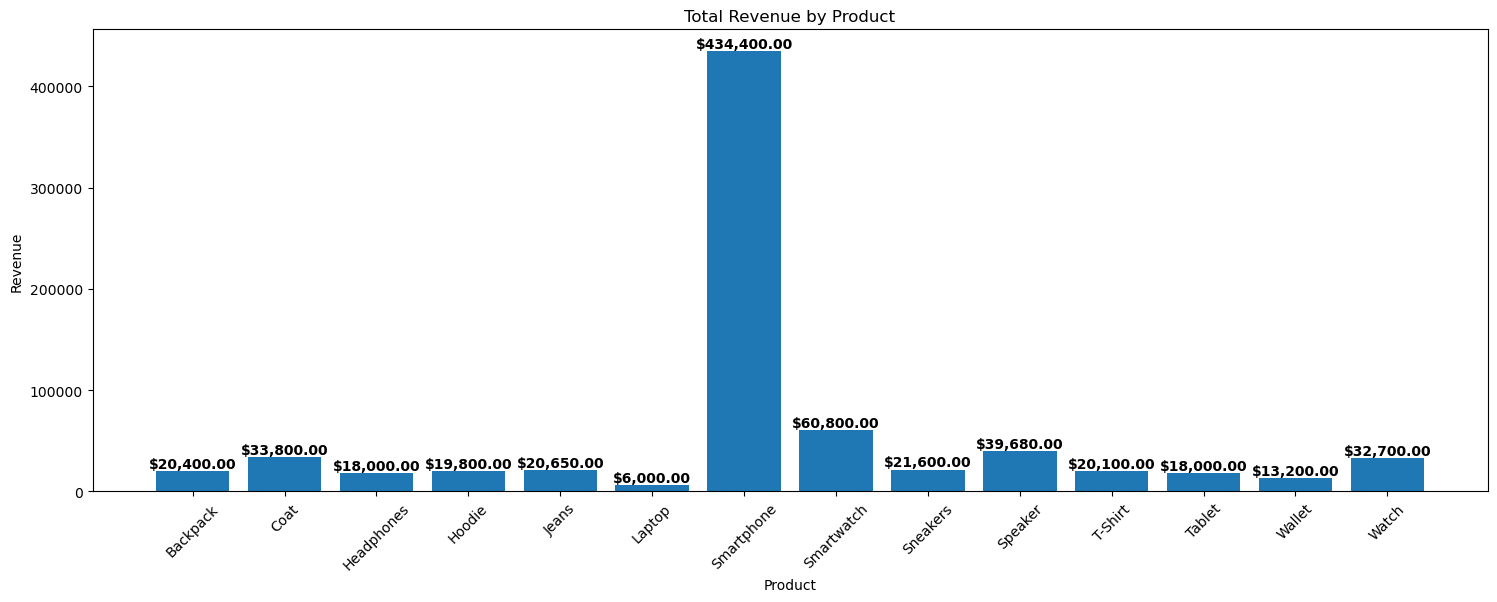

In [57]:
plt.figure(figsize=(18, 6)) 


plt.bar(product_revenue.index, product_revenue.values)

for i, val in enumerate(product_revenue.values):
    plt.text(i, val, '${:,.2f}'.format(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

# set the chart title and axis labels
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the chart
plt.show()

#### The product with the highest revenue is Smartphone, which generated 434,400$ in revenue.

## What was the average price of a product sold by the company?

In [52]:
product_avg_price = df.groupby('product')['price'].mean()

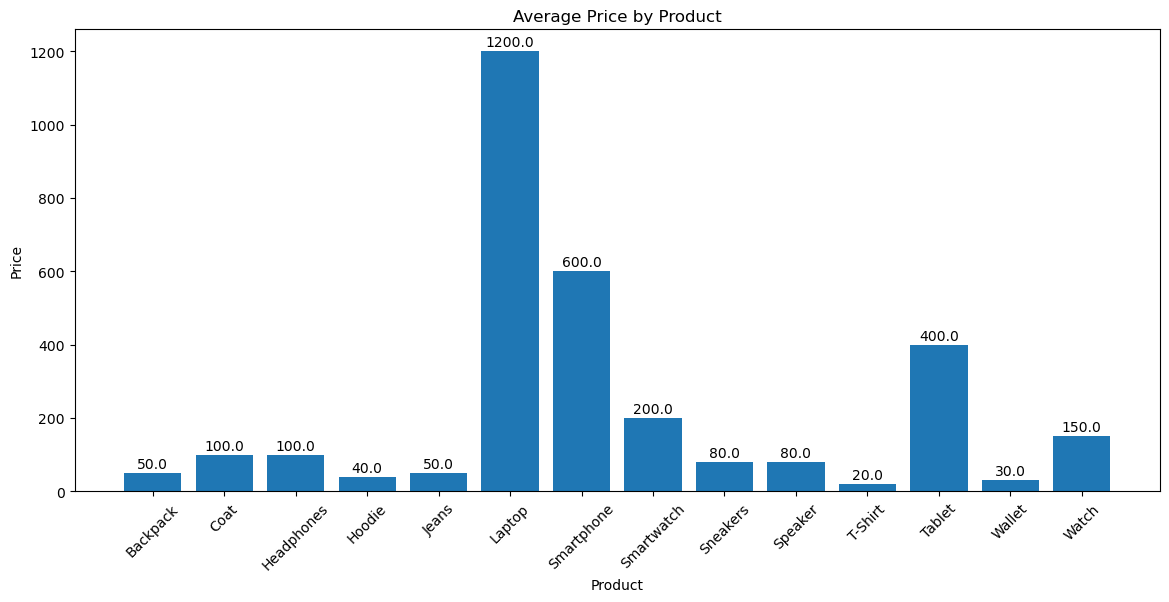

In [53]:

product_avg_price = df.groupby('product')['price'].mean()


plt.figure(figsize=(14, 6)) 


bar_plot = plt.bar(product_avg_price.index, product_avg_price.values)


for i, v in enumerate(product_avg_price.values):
    plt.text(i, v + 5, str(round(v, 2)), ha='center', va='bottom')


plt.title('Average Price by Product')
plt.xlabel('Product')
plt.ylabel('Price')


plt.xticks(rotation=45)


plt.show()

## What was the total quantity of products sold by the company?

In [54]:
df['quantity'].sum()

5341.0

In [59]:
product_quantity = df.groupby('product')['quantity'].sum()
product_quantity

product
Backpack       408.0
Coat           338.0
Headphones     180.0
Hoodie         495.0
Jeans          413.0
Laptop           5.0
Smartphone     724.0
Smartwatch     304.0
Sneakers       270.0
Speaker        496.0
T-Shirt       1005.0
Tablet          45.0
Wallet         440.0
Watch          218.0
Name: quantity, dtype: float64

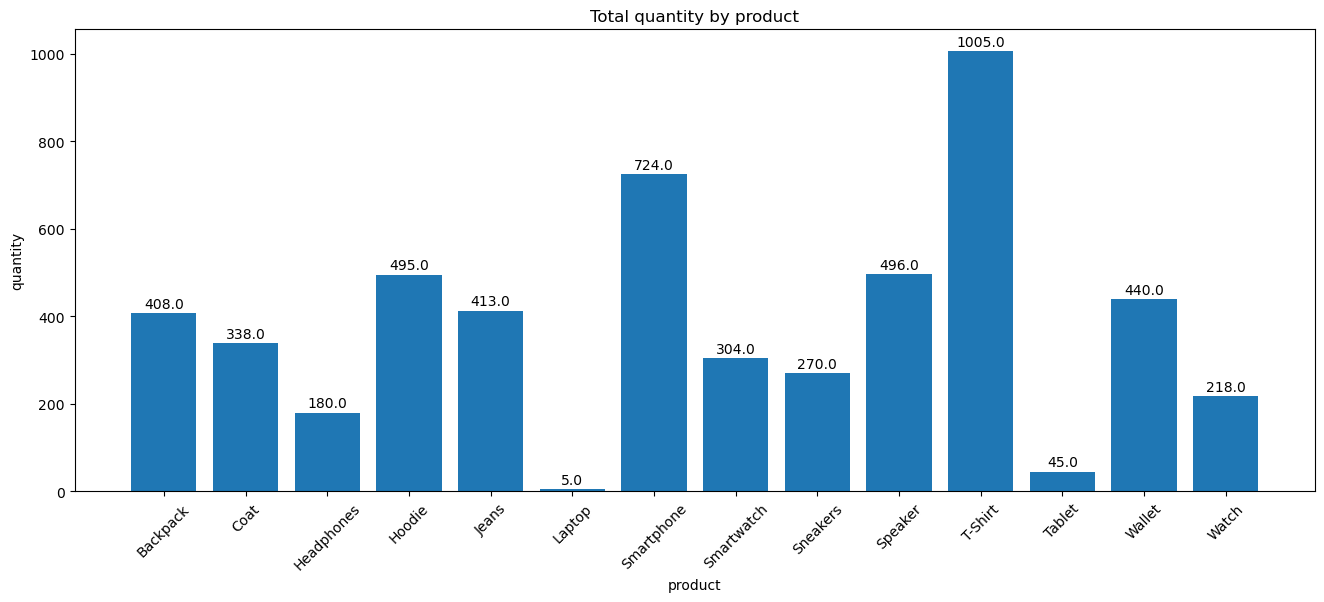

In [60]:
plt.figure(figsize=(16,6))
plt.bar(product_quantity.index, product_quantity.values)


for i, v in enumerate(product_quantity.values):
    plt.text(i, v + 5, str(round(v, 2)), ha='center', va='bottom')
    
plt.title("Total quantity by product")
plt.xlabel("product")
plt.ylabel("quantity")

plt.xticks(rotation=45)

plt.show()

## Which category had the highest revenue? How much revenue did it generate?

In [62]:
cat_revenue = df.groupby('category')['revenue'].sum()
cat_revenue

category
Accessories    106700.0
Bags            20400.0
Clothing        94350.0
Electronics    516080.0
Shoes           21600.0
Name: revenue, dtype: float64

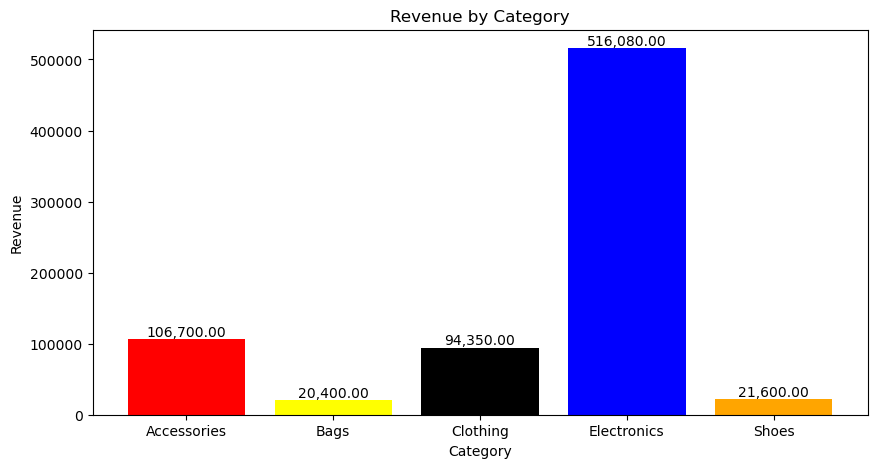

In [64]:
plt.figure(figsize=(10, 5))

c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(cat_revenue.index, cat_revenue.values, color=c)

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

# Add revenue values on each bar
for i, v in enumerate(cat_revenue.values):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

In [65]:
cat_revenue_mean = df.groupby('category')['revenue'].mean()
cat_revenue_mean

category
Accessories    1524.285714
Bags            850.000000
Clothing        786.250000
Electronics    3969.846154
Shoes           900.000000
Name: revenue, dtype: float64

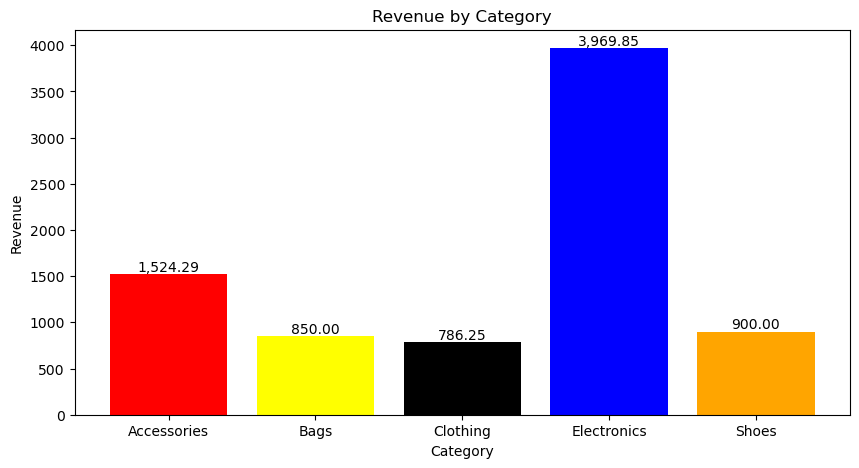

In [66]:
plt.figure(figsize=(10, 5))

c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(cat_revenue_mean.index, cat_revenue_mean.values, color=c)

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

# Add revenue values on each bar
for i, v in enumerate(cat_revenue_mean.values):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

### What was the average revenue per sale?

In [69]:
avg_revenue_per_sale = df['revenue'].sum() / df['quantity'].sum()
print('Average revenue per sale:', round(avg_revenue_per_sale,2))

Average revenue per sale: 142.13


### What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)?

In [71]:
quarterly_revenue = df.groupby(pd.Grouper(key='date', freq='Q')).sum()['revenue']
quarterly_revenue

C:\Users\YN\AppData\Local\Temp\ipykernel_32616\3580912045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_revenue = df.groupby(pd.Grouper(key='date', freq='Q')).sum()['revenue']


date
2022-03-31    182100.0
2022-06-30    185970.0
2022-09-30    197680.0
2022-12-31    193380.0
Freq: Q-DEC, Name: revenue, dtype: float64

In [72]:
# Extract the quarter from the date column and create a new column for it
df['quarter'] = df['date'].dt.quarter

In [73]:
quarter_revenue = df.groupby('quarter')['revenue'].sum()
quarter_revenue

quarter
1    182100.0
2    185970.0
3    197680.0
4    193380.0
Name: revenue, dtype: float64

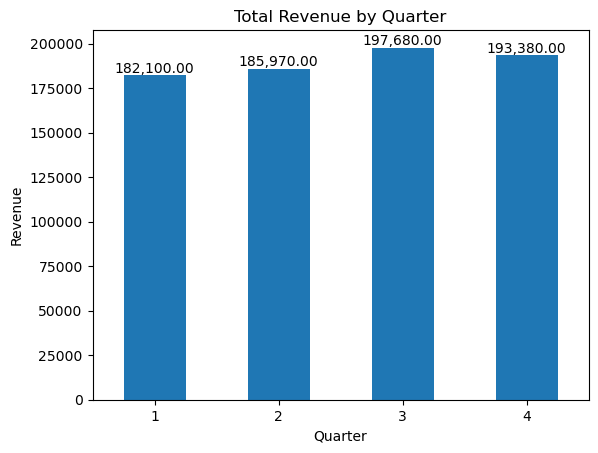

In [75]:
ax = quarter_revenue.plot(kind='bar', rot=0)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Total Revenue by Quarter')


for i, v in enumerate(quarter_revenue):
    ax.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)


plt.savefig('revenue_by_quarter.png', dpi=300, bbox_inches='tight')


plt.show()

In [76]:
plt.savefig("chart.png")

<Figure size 640x480 with 0 Axes>

### How has revenue changed over time?

In [78]:
revenue_by_date = df.groupby('date')['revenue'].sum()
revenue_by_date

date
2022-01-01    12000.0
2022-01-02     1000.0
2022-01-03     2000.0
2022-01-04      500.0
2022-01-05     1500.0
               ...   
2022-12-27      750.0
2022-12-28      500.0
2022-12-29     1000.0
2022-12-30     6600.0
2022-12-31     1200.0
Name: revenue, Length: 365, dtype: float64

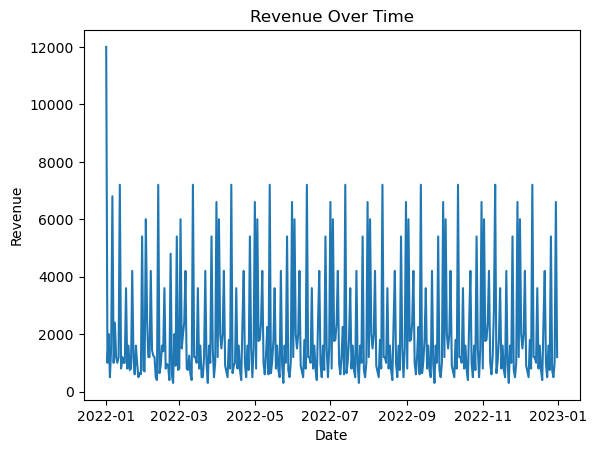

In [79]:
plt.plot(revenue_by_date)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')

plt.show()

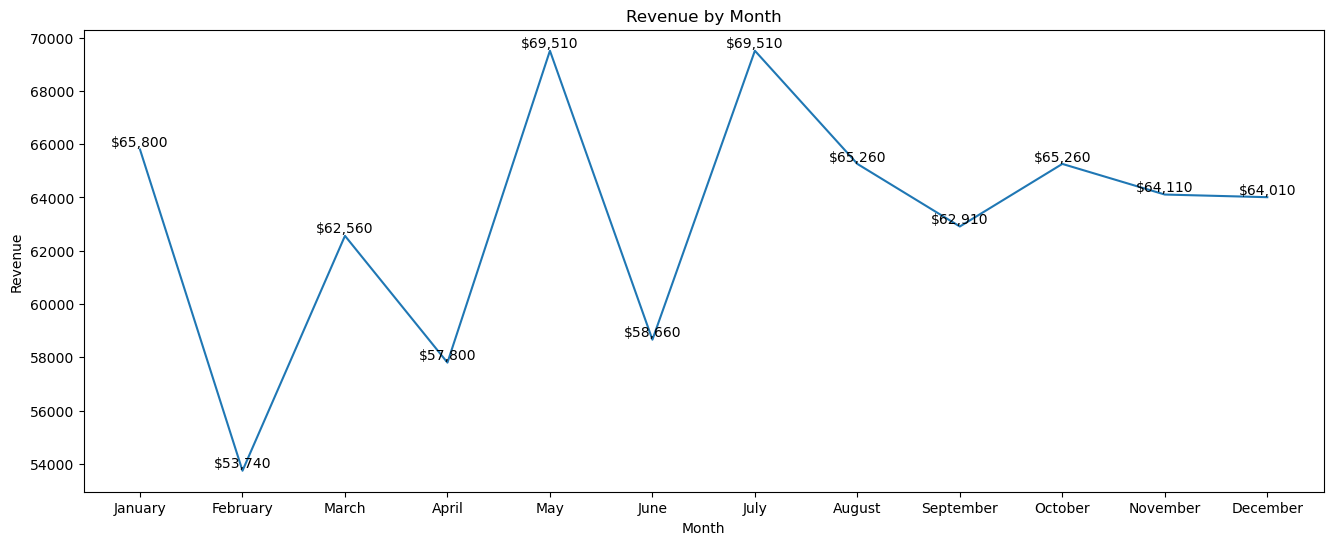

In [80]:
# Group the data by month and sum the revenue column
revenue_by_month = df.groupby(df['date'].dt.strftime('%B'))['revenue'].sum()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the revenue data by the month order
revenue_by_month = revenue_by_month.reindex(month_order)

# Create a line chart of revenue by month
plt.figure(figsize=(16,6))
plt.plot(revenue_by_month)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')

# Add the value of revenue for each month to the line chart
for i, v in enumerate(revenue_by_month):
    plt.text(i, v, "${:,.0f}".format(v), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()